# Frequency-Domain Analysis of Large Datasets

## Author(s)
**Paige Martin and Ryan Abernathey**

- Author1 = {"name": "Paige Martin", "affiliation": "Australian National University/Lamont-Doherty Earth Observatory", "email": "paigemar@umich.edu", "orcid": "0000-0003-3538-633X"}
- Author2 = {"name": "Ryan Abernathey", "affiliation": "Lamont-Doherty Earth Observatory", "email": "rpa@ldeo.columbia.edu", "orcid": "0000-0001-5999-4917"}

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Template-Notebook-for-EarthCube---Long-Version" data-toc-modified-id="Template-Notebook-for-EarthCube---Long-Version-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Template Notebook for EarthCube - Long Version</a></span><ul class="toc-item"><li><span><a href="#Author(s)" data-toc-modified-id="Author(s)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Author(s)</a></span></li><li><span><a href="#Purpose" data-toc-modified-id="Purpose-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Purpose</a></span></li><li><span><a href="#Technical-contributions" data-toc-modified-id="Technical-contributions-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Technical contributions</a></span></li><li><span><a href="#Methodology" data-toc-modified-id="Methodology-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Methodology</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Results</a></span></li><li><span><a href="#Funding" data-toc-modified-id="Funding-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Funding</a></span></li><li><span><a href="#Keywords" data-toc-modified-id="Keywords-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Keywords</a></span></li><li><span><a href="#Citation" data-toc-modified-id="Citation-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Citation</a></span></li><li><span><a href="#Work-In-Progress---improvements" data-toc-modified-id="Work-In-Progress---improvements-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Work In Progress - improvements</a></span></li><li><span><a href="#Suggested-next-steps" data-toc-modified-id="Suggested-next-steps-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Suggested next steps</a></span></li><li><span><a href="#Acknowledgements" data-toc-modified-id="Acknowledgements-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>Acknowledgements</a></span></li></ul></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Library-import" data-toc-modified-id="Library-import-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Library import</a></span></li><li><span><a href="#Local-library-import" data-toc-modified-id="Local-library-import-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Local library import</a></span></li></ul></li><li><span><a href="#Parameter-definitions" data-toc-modified-id="Parameter-definitions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Parameter definitions</a></span></li><li><span><a href="#Data-import" data-toc-modified-id="Data-import-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data import</a></span></li><li><span><a href="#Data-processing-and-analysis" data-toc-modified-id="Data-processing-and-analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data processing and analysis</a></span><ul class="toc-item"><li><span><a href="#The-10-rules" data-toc-modified-id="The-10-rules-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>The 10 rules</a></span></li><li><span><a href="#Using-notebook-template" data-toc-modified-id="Using-notebook-template-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Using notebook template</a></span></li><li><span><a href="#Adding-table-of-contents" data-toc-modified-id="Adding-table-of-contents-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Adding table of contents</a></span></li><li><span><a href="#Creating-Binder-and-Docker-for-your-notebook-repository" data-toc-modified-id="Creating-Binder-and-Docker-for-your-notebook-repository-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Creating Binder and Docker for your notebook repository</a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>References</a></span></li></ul></div>

## Purpose

Climate model datasets are typically stored as global snapshots, i.e. chunked in time rather than space. For many workflows, this chunking works well (e.g. computations across spatial domains at every point in time). However, this storage format can create serious challenges for processing long time series at each point in space, as is the case for frequency-domain analysis. For large datasets with frequent (e.g. daily) output, it is not feasible to process each spatial point as a single time series, even with the help of distributed computing such as Dask.

This notebook provides an example scientific workflow for performing frequency-domain analysis on large datasets. Specifically, this notebook presents a workflow for computing the power spectrum of sea surface temperature in the [Community Earth System Model](https://www.cesm.ucar.edu) (CESM). While we carry out computations on a specific model, the main goal of this notebook is not to interpret scientific results from our computations, but rather to provide a working example of frequency-domain analysis on large datasets that others could follow.

Because the goal of this notebook is to provide an example of a workflow that works on large datasets, we have chosen to use a large dataset (CESM) that is available on Pangeo Cloud. This notebook is therefore developed for a Jupyter Hub environment that can access data stored on the Pangeo Cloud (e.g. [PangeoBinder](https://binder.pangeo.io)).


## Technical contributions

- demonstrates how to quickly rechunk data, e.g. from chunks in time to chunks in space, using the package [rechunker](https://rechunker.readthedocs.io/en/latest/)
- demonstrates how to easily perform Fourier analysis using the package [xrft](https://xrft.readthedocs.io/en/latest/)
- shows that all of these steps, with the use of [Xarray](http://xarray.pydata.org/en/stable/) and [Dask](https://dask.org) can be taken with large datasets


## Methodology

The notebook follows three main steps:

1) Rechunk the data. We begin by rechunking the CESM sea surface temperature (SST) output from global, daily snapshots to chunks in space and 5-year chunks in time. This step is accomplished using the package `rechunker`. 

2) Fourier analysis. Next we compute the power spectrum of SST using the package `xrft`, which nicely integrates with `Xarray` and `Dask`. Within `xrft`, we are also able to easily apply detrending and windowing functions to our data, and also account for the fact that our data are real (with no imaginary components).

3) Visualize the data. Last, we average over various frequency bands to show the spatial distribution of the SST power spectrum as global maps.

Between each of these steps, we would typically write out the intermediate data. So we would write out the rechunked data, as well as the processed power spectra. Being able to write out data at intermediate steps is crucial to this workflow. However, due to the inability to write out data from Binder, we instead import previously processed data in this notebook. We still include all of the code necessary to run all of the steps if a user wishes to run this notebook elsewhere that allows for data to be written out.


## Results
This notebook presents a feasible example for performing frequency-domain analysis on large datasets. Specifically, this notebook demonstrates how to quickly rechunk ~500GB of data from chunking in time to chunking in space. It also demonstrates how to pair the `xrft` library with the rechunked data to take Fourier Transforms (here power spectra) and obtain interpretable results. We finish with a few sample plots to round out the workflow. This notebook is meant to serve as an example for others who wish to perform similar types of analysis.


## Funding

- Award1 = {"agency": "Gordon and Betty Moore Foundation", "award_code": "", "award_URL": "https://www.moore.org"}

## Keywords

keywords=["frequency-domain", "Pangeo", "Fourier analyis", "rechunking", "cloud computing"]

## Citation

Martin and Abernathey 2021. Frequency-Domain Analysis of Large Datasets. Accessed at **link**.

## Acknowledgements 

We thank the Pangeo community for developing and maintaining most of the packages used in this notebook. We also acknowledge Pangeo Cloud, which provides the computing power for this analysis. 

# Setup

## Library import

In [1]:
# Reading in data
import intake
import gcsfs
import zarr
import os

# Data manipulation
import xarray as xr
import dask.array as dsa
from rechunker import rechunk
import xrft

# Distributed computing
from dask_gateway import Gateway
from dask.distributed import Client

# Visualization
import cmocean
import matplotlib.pyplot as plt

# Data import, processing, and analysis

***

# Step 1: Open and rechunk the original data

This dataset is stored on the [Pangeo Cloud](https://catalog.pangeo.io/) and contains daily output for 41 model years. 

### Access the data

In [2]:
# Access CESM output from Pangeo Cloud data catalog
cat = intake.open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/CESM_POP.yaml")
item = cat['CESM_POP_hires_control']  # Specify CESM high resolution control run
ds_orig = item.to_dask().reset_coords(drop=True)  # drop unneeded coordinates for efficiency
ds_orig

<xarray.Dataset>
Dimensions:   (nlat: 2400, nlon: 3600, time: 14965, z_t: 62, z_t_150m: 15, z_w: 62, z_w_bot: 62, z_w_top: 62)
Coordinates:
  * time      (time) object 0046-01-02 00:00:00 ... 0087-01-01 00:00:00
  * z_t       (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.625e+05 5.875e+05
  * z_t_150m  (z_t_150m) float32 500.0 1.5e+03 2.5e+03 ... 1.35e+04 1.45e+04
  * z_w       (z_w) float32 0.0 1e+03 2e+03 3e+03 ... 5.25e+05 5.5e+05 5.75e+05
  * z_w_bot   (z_w_bot) float32 1e+03 2e+03 3e+03 ... 5.5e+05 5.75e+05 6e+05
  * z_w_top   (z_w_top) float32 0.0 1e+03 2e+03 ... 5.25e+05 5.5e+05 5.75e+05
Dimensions without coordinates: nlat, nlon
Data variables:
    HMXL_2    (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    SFWF_2    (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    SHF_2     (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    SSH_2     (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    SSS       (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    SST       (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    TAUX_2    (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    TAUY_2    (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    U1_1      (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    U2_2      (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    V1_1      (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    V2_2      (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
Attributes:
    Conventions:   CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curren...
    calendar:      All years have exactly  365 days.
    cell_methods:  cell_methods = time: mean ==> the variable values are aver...
    contents:      Diagnostic and Prognostic Variables
    history:       none
    nsteps_total:  13088337
    revision:      $Id: tavg.F90 41939 2012-11-14 16:37:23Z mlevy@ucar.edu $
    source:        CCSM POP2, the CCSM Ocean Component
    start_time:    This dataset was created on 2013-03-09 at 12:25:55.7
    tavg_sum:      86399.99999999962
    title:         hybrid_v5_rel04_BC5_ne120_t12_pop62

We are interested in working with SST.
Let's make a quick plot to see what the data looks like.
Pre-coarsening makes the plot faster to load.

/srv/conda/envs/notebook/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


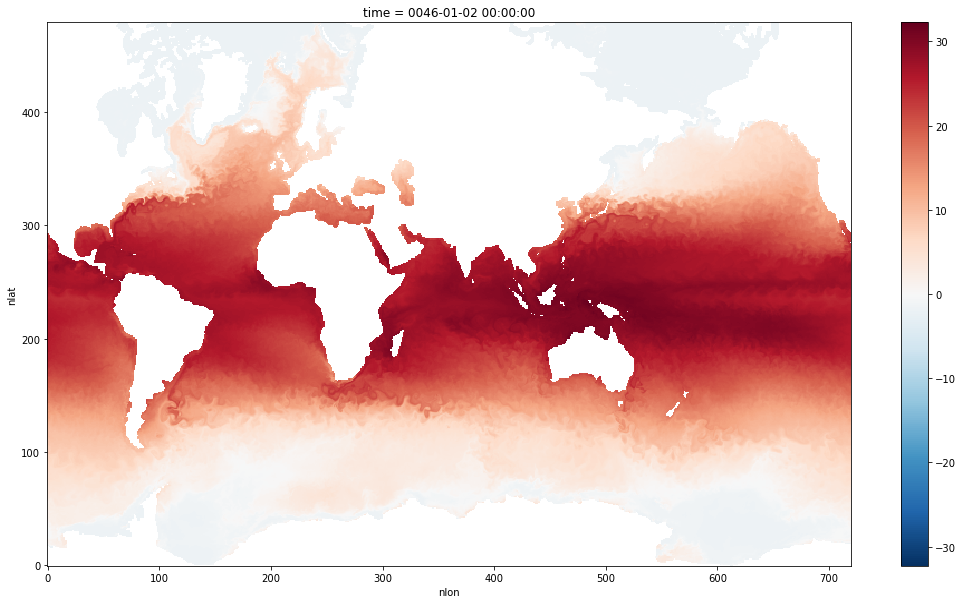

In [3]:
ds_orig.SST[0].coarsen(nlat=5, nlon=5).mean().plot(figsize=(18, 10))

Note the chunk structure of the original data: contiguous in the spatial dimension and chunked in the time dimension.
This is not optimal for frequency-domain spectral analysis.

In [4]:
ds_orig.SST

<xarray.DataArray 'SST' (time: 14965, nlat: 2400, nlon: 3600)>
dask.array<xarray-SST, shape=(14965, 2400, 3600), dtype=float32, chunksize=(1, 2400, 3600), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0046-01-02 00:00:00 ... 0087-01-01 00:00:00
Dimensions without coordinates: nlat, nlon
Attributes:
    cell_methods:  time: mean
    grid_loc:      2110
    long_name:     Surface Potential Temperature
    units:         degC

## Rechunk the data. 

Rechunker allows us to transform the chunk structure of the dataset using Dask distributed computing in order to facilitate time-domain analysis of the dataset.
Since we are only interested in specific variables, we rechunk a single variable (in this case SST) at a time.


<div class="alert alert-info">

**Note:** 
Rechunking requires the ability to write hundreds of GB to cloud storage.
If you are running this notebook in a binder, your environment has read access to Google Cloud Storage, but not write access.
(Providing anonymous write access would be a major security threat.)
Therefore, below we display the code needed ifor rechunking in a markdown cell, rather than an executable cell.
Instead, we point to a rechunked dataset that has already been written and then continue with the Fourier transform steps.
</div>

Users running on Pangeo Cloud should be able to run this code with no changes, since credentials are automatically populated.
Users who have their own Google Cloud account could modify this code by providing valid credentials and a path to their own storage buckets.

```python
# Open data as Zarr group
gcs = gcsfs.GCSFileSystem(requester_pays=True) # Connect to Google Cloud Storage (GCS)
mapper = gcs.get_mapper(item.urlpath) # gcs.get_mapper() is like getting the pathname of the data on GCS
zgroup = zarr.open_consolidated(mapper) # Open the dataset in Zarr format

# Select SST variable
varname = 'SST' # name of variable you wish to rechunk (SST in this case)
array = zgroup[varname] # select only the SST variable from the Zarr group

# Write intermediary data to a temporary path. Items stored here get deleted every 7 days.
scratch_path = os.environ['PANGEO_SCRATCH']
scratch_path

# Define options needed by the `rechunk()` function of `rechunker`.
max_mem = '1GB' # request memory for dask workers
target_chunks = (365*5, 90, 180) # chunk in time (5 years) and space

# Set paths to temporary and target storage locations and set names of output data
tmp_path = f'{scratch_path}/CESM_POP_hires_control/{varname}_tmp_earthcube_TEST.zarr'
target_path = f'{scratch_path}/CESM_POP_hires_control/{varname}_target_earthcube_TEST.zarr'
```

```python
# Delete arrays of the same name that already exist at those paths
def clear_targets():
    for path in tmp_path,target_path:
        try:
            gcs.rm(path + '/.zarray')
        except FileNotFoundError:
            pass
clear_targets()
```

```python
# Create mappings to temporary and target storage buckets
store_tmp = gcs.get_mapper(tmp_path)
store_target = gcs.get_mapper(target_path)
```

```python
# Call the `rechunk()` function. Below it shows the type of the source, intermediate, and target data.
r = rechunk(array, target_chunks, max_mem,
            store_target, temp_store=store_tmp, executor='dask')
```

### (Set up Dask cluster)

Note that to successfully run `rechunk()` it is necessary to spin up a Dask cluster. To see how we do so on Pangeo Cloud using Dask Gateway, see the following section on computing the power spectrum.

#### Execute the `rechunk()` function

```python
r.execute(retries=10) # `retries=10` sets the number of times a Dask worker will retry if computing fails (default is 0)
```

***

# Step 2: Compute the power spectrum of SST

The power spectrum is defined as follows, where a hat denotes a Fourier transform and the star denotes a complex conjugate.

$$
\widehat{SST}^* \widehat{SST}
$$

Here we read in the rechunked SST field obtained by following all of the above steps. 

In [5]:
# Read previously rechunked data from my GCS storage bucket
gcs = gcsfs.GCSFileSystem(requester_pays=True)
varname = 'SST' 
target_path = f'pangeo-paigem/CESM_POP_hires_control/{varname}_target.zarr'
Tda = dsa.from_zarr(gcs.get_mapper(target_path)) # load as dask file
Tda

,Array,Chunk
Bytes,517.19 GB,118.26 MB
Shape,"(14965, 2400, 3600)","(1825, 90, 180)"
Count,4861 Tasks,4860 Chunks
Type,float32,numpy.ndarray


### Work with a 10-year subset of the rechunked data

Though we only show the workflow for one 10-year subset below, when running this workflow for scientific output we compute the power spectrum across several (in this case 10-year) windows. By averaging over all windows in our final plots, we are able to smooth out the naturally noisy Fourier Transform while also getting better statistics. 

In [6]:
# Create 10-year subset over first 10 years of output
yr1 = 0
yr2 = 10

Tda = Tda[365*yr1:365*yr2,:,:]

# Convert from dask to xarray DataArray
Txr = xr.DataArray(Tda,dims=['time','nlat','nlon'])
Txr

,Array,Chunk
Bytes,126.14 GB,118.26 MB
Shape,"(3650, 2400, 3600)","(1825, 90, 180)"
Count,5941 Tasks,1080 Chunks
Type,float32,numpy.ndarray


### Define function to take power spectrum

In [7]:
def take_power_spectrum(var,real_arg):
    
    var = var.chunk({'time':None}) # there can be no chunking in the time dimension
    var_filled = var.fillna(0) # fill NaNs with zeros
    
    # Take power spectrum in the time domain, setting time to be a real dimension, with both a linear detrend and a windowing function
    var_hat = xrft.power_spectrum(var_filled,dim='time',real=real_arg,detrend='linear',window=True)
    
    return var_hat

### Compute the power spectrum of SST

In [8]:
# Call the
T_fft = take_power_spectrum(Txr,'time')

# Take only the real output, and immediately coarsen to 0.5 degree grid to reduce the memory usage
T_power_spectrum = T_fft.real.coarsen(nlat=5, nlon=5).mean()
T_power_spectrum

,Array,Chunk
Bytes,5.05 GB,9.47 MB
Shape,"(480, 720, 1826)","(18, 36, 1826)"
Count,16206 Tasks,540 Chunks
Type,float64,numpy.ndarray


### Load Some Results

So far, all of our calculations have been "lazy".
No computation has actually happened yet.
In order to load some data, we will subset the data to a size that can fit into our notebook's memory.
We select a region in the North Atlantic.

In [9]:
region = dict(nlat=slice(290, 380), nlon=slice(50, 220))
T_power_spectrum_NAtl = T_power_spectrum.isel(**region)
T_power_spectrum_NAtl

<xarray.DataArray (nlat: 90, nlon: 170, freq_time: 1826)>
dask.array<getitem, shape=(90, 170, 1826), dtype=float64, chunksize=(18, 36, 1826), chunktype=numpy.ndarray>
Coordinates:
  * freq_time          (freq_time) float64 0.0 0.000274 0.0005479 ... 0.4997 0.5
    freq_time_spacing  float64 0.000274
Dimensions without coordinates: nlat, nlon

### Start Dask cluster

Now that we are ready to compute, we will start a Dask caluster.
This Dask cluster sets each worker to use 8 GB of memory, and allows for up to 20 workers to spin up (using adaptive scaling).

In [10]:
from dask_gateway import Gateway
gateway = Gateway()
options = gateway.cluster_options()
options.worker_memory = 8 # assign each worker 8 GB of memory
cluster = gateway.new_cluster(options)
cluster.adapt(minimum=1, maximum=20) # use adaptive scaling to allow up to 20 workers
cluster # print out cluster information - you can use this to view when the cluster spins up

In [11]:
# Start the client
from dask.distributed import Client
client = Client(cluster)
client # the link below can be used to access the Dask dashboard

Client Scheduler: gateway://traefik-prod-dask-gateway.prod:80/prod.4d5e42578cf541f0acac6802b58f2c20 Dashboard: https://hub.binder.pangeo.io/services/dask-gateway/clusters/prod.4d5e42578cf541f0acac6802b58f2c20/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


Calling `load` triggers the cluster to scale up elastically and finish the computation.

In [12]:
T_power_spectrum_NAtl.load()

<xarray.DataArray (nlat: 90, nlon: 170, freq_time: 1826)>
array([[[1.79173143e+00, 2.86886186e+00, 2.04364084e+01, ...,
         2.34126784e-04, 2.38381535e-04, 3.82684421e-04],
        [3.31644487e-01, 9.09105379e+00, 3.10248907e+01, ...,
         3.43455179e-04, 2.04848964e-04, 2.28702936e-04],
        [2.79755161e+00, 1.14803794e+01, 2.44600838e+01, ...,
         3.63753519e-04, 1.93011390e-04, 2.26850031e-04],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[2.66488356e-01, 3.59787452e+00, 2.80748797e+01, ...,
         2.86492066e-04, 2.04746335e-04, 1.96007346e-04],
        [1.59851756e-01, 1.07411179e+01, 3.49675480e+01, ...,
         2.66867650e-04, 1.91040370e-04, 1.60823705e-04],
        [5.71527779e+00, 1.38214634e+01, 1.98156308e+01, ...,
         1.45470944e-04, 1.71840569e-04, 8.85413466e-05],
...
        [1.55131589e-01, 2.32805167e+00, 5.75693465e+00, ...,
         2.40151366e-04, 1.81495897e-04, 8.05312581e-05],
        [4.72815513e-01, 1.45240597e+00, 1.97985368e+00, ...,
         7.09667017e-04, 7.56868476e-04, 1.05811034e-03],
        [3.37849823e+00, 9.45537125e+00, 6.78600783e+00, ...,
         2.55801393e-03, 3.57793998e-03, 3.83836296e-03]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [5.60357230e-01, 6.49278220e+00, 4.18976748e+00, ...,
         1.08163125e-03, 8.86709901e-04, 3.52323166e-04],
        [9.47713473e-01, 6.01073209e+00, 2.58937127e+00, ...,
         2.87614456e-03, 6.41818711e-03, 5.13676427e-03],
        [5.63584748e+00, 2.12229115e+01, 1.66377953e+01, ...,
         5.15451193e-03, 6.77554372e-03, 1.02069979e-02]]])
Coordinates:
  * freq_time          (freq_time) float64 0.0 0.000274 0.0005479 ... 0.4997 0.5
    freq_time_spacing  float64 0.000274
Dimensions without coordinates: nlat, nlon

Re-mask the data:

In [13]:
mask = (ds_orig.SST[0].notnull().astype(int).coarsen(nlon=5, nlat=5).mean() > 0.2).isel(**region).load()
T_power_spectrum_NAtl = T_power_spectrum_NAtl.where(mask)

### Write to Zarr

At this point in our workflow, to do the gull globe, we would write out the power spectrum computation back to disk. However, we again include this cell as Markdown only since Binder does not have write access.

```python
# Set path to save power spectrum
url = f'{scratch_path}/CESM_POP_hires_control/SST_power_spectrum_yr{yr1}_{yr2}_earthcube_test.zarr'

# Save to Zarr
T_power_spectrum_reset.to_dataset(name='SST_power_spectrum').to_zarr(gcs.get_mapper(url)) # need to convert xarray DataArray to Dataset first
```

***

# Step 3: Plot Results

### Area Average Power Spectrum

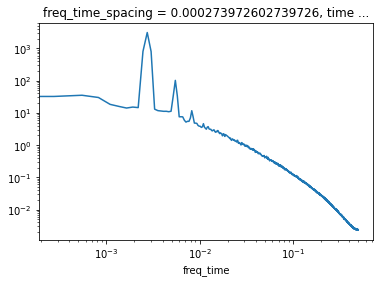

In [14]:
T_power_spectrum_NAtl.mean(dim=('nlon', 'nlat')).plot(yscale='log', xscale='log')

### Maps of different band averages

In [15]:
bands = {
    "> 1 year": slice(1/(3650), 1/400),
    "~ 1 year": slice(1/370, 1/360),
    "100 days - 1 year": slice(1/360, 1/100),
    "10 days - 100 days": slice(1/100, 1/10),
    "< 10 days": slice(1/10, None)
}

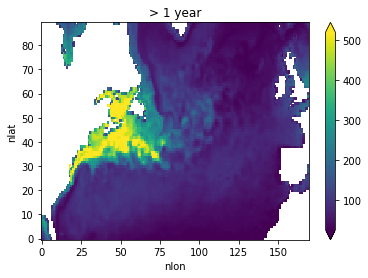

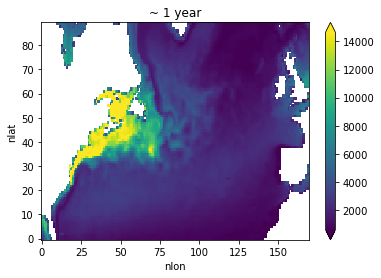

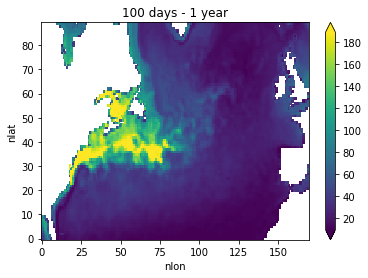

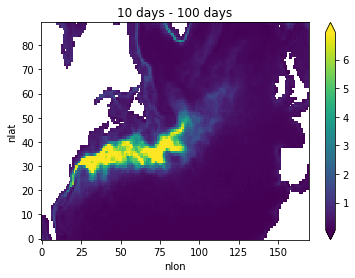

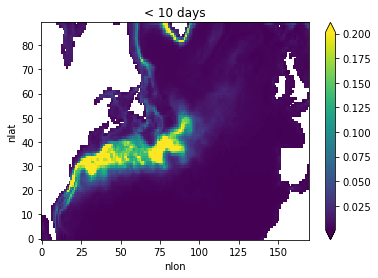

In [16]:
for name, band_slice in bands.items():
    plt.figure()
    T_power_spectrum_NAtl.sel(freq_time=band_slice).mean('freq_time').plot(robust=True)
    plt.title(name)